# Explore here

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
import itertools
import joblib

url= "https://breathecode.herokuapp.com/asset/internal-link?id=2546&path=sales.csv"

In [96]:
df = pd.read_csv(url)

In [97]:
df.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [98]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [99]:
df

,sales
date,
2022-09-03 17:10:08.079328,55.292157
2022-09-04 17:10:08.079328,53.803211
2022-09-05 17:10:08.079328,58.141693
2022-09-06 17:10:08.079328,64.530899
2022-09-07 17:10:08.079328,66.013633
...,...
2023-08-30 17:10:08.079328,989.600354
2023-08-31 17:10:08.079328,994.987326
2023-09-01 17:10:08.079328,995.814415


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2022-09-03 17:10:08.079328 to 2023-09-03 17:10:08.079328
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sales   366 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [101]:
df.describe()

,sales
count,366.000000
mean,524.963968
std,275.089698
min,53.803211
25%,290.186822
50%,520.699468
75%,763.289263
max,1000.482785


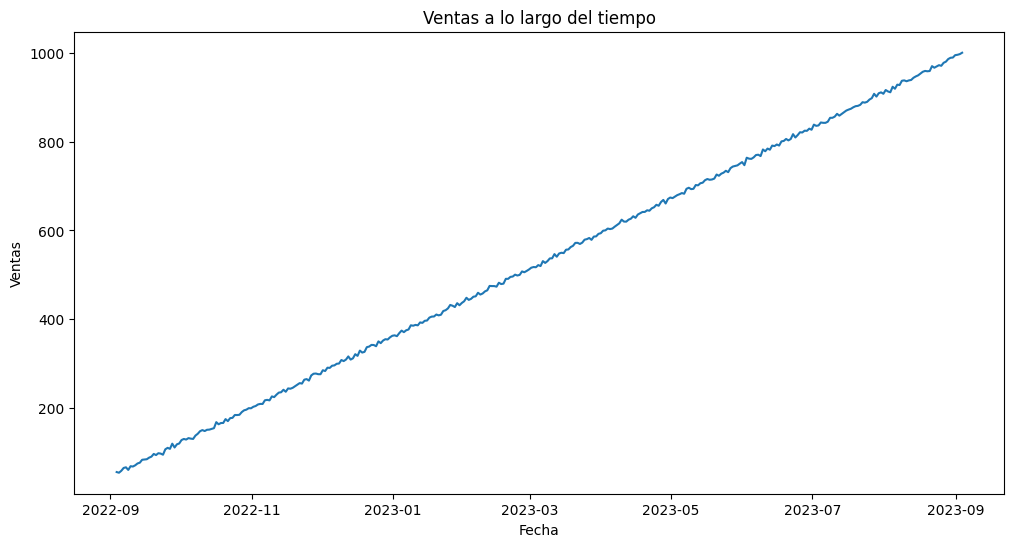

In [102]:
plt.figure(figsize=(12,6))
plt.plot(df["sales"])
plt.title("Ventas a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Ventas")
plt.show()

/tmp/ipykernel_5562/1800842463.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df['sales'].resample('M').mean()


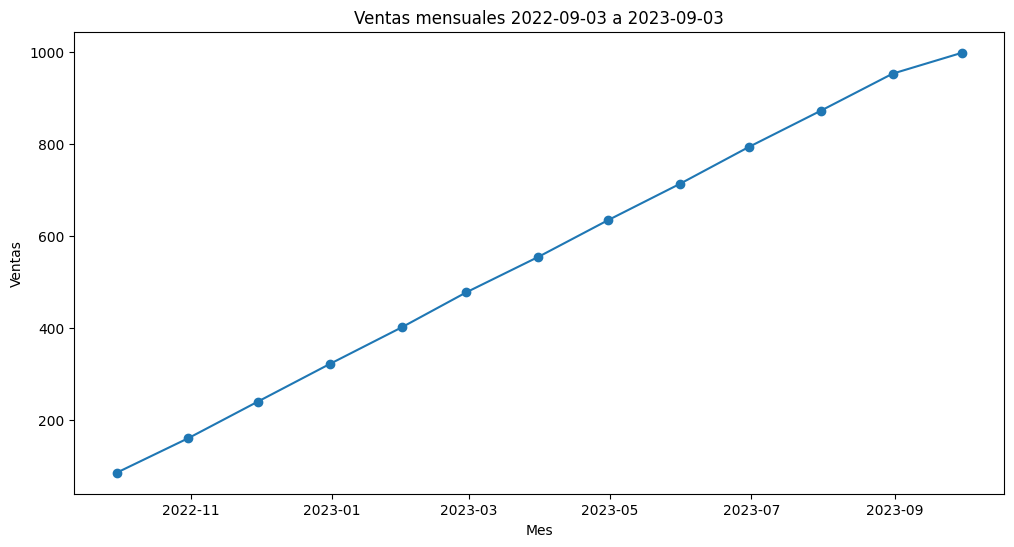

In [103]:
# Convertir índice a datetime
df.index = pd.to_datetime(df.index)

# Filtrar el rango de fechas deseado
df = df['2022-09-03':'2023-09-03']

# Agrupar por mes 
df_monthly = df['sales'].resample('M').mean()

# Graficar
plt.figure(figsize=(12,6))
plt.plot(df_monthly, marker='o')
plt.title("Ventas mensuales 2022-09-03 a 2023-09-03")
plt.xlabel("Mes")
plt.ylabel("Ventas")
plt.show()


In [104]:
print("Frecuencia de los datos:", pd.infer_freq(df.index))

Frecuencia de los datos: D


podemos ver que el tensor es diario

In [ ]:
result = adfuller(df["sales"])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
if result[1] < 0.05:
    print("La serie es estacionaria")
else:
    print("La serie no es estacionaria")


ADF Statistic: 0.545414193706378
p-value: 0.9861899815311064
La serie no es estacionaria


In [106]:
# Dividir en entrenamiento y prueba (80%-20%)
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

In [110]:
model = auto_arima(
    train,
    seasonal=False, 
    stepwise=True,
    suppress_warnings=True,
    error_action='ignore'
)

print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  292
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -734.582
Date:                Fri, 14 Nov 2025   AIC                           1475.165
Time:                        20:04:37   BIC                           1486.185
Sample:                    09-03-2022   HQIC                          1479.579
                         - 06-21-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.5984      0.011    243.641      0.000       2.577       2.619
ma.L1         -0.9439      0.021    -44.117      0.000      -0.986      -0.902
sigma2         9.0537      0.817     11.084      0.0

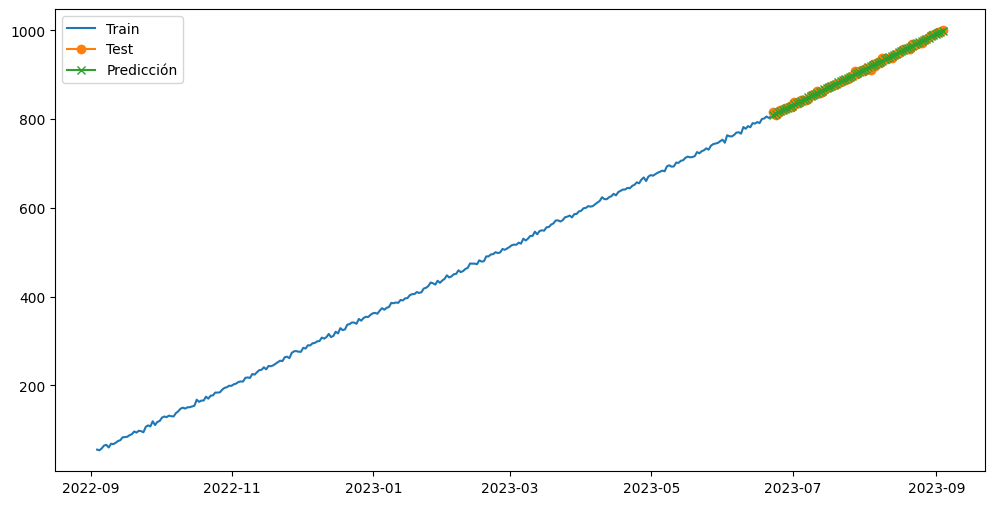

In [111]:
pred = model.predict(n_periods=len(test))

plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', marker='o')
plt.plot(test.index, pred, label='Predicción', marker='x')
plt.legend()
plt.show()


In [112]:
rmse = np.sqrt(mean_squared_error(test, pred))
print("RMSE:", rmse)

RMSE: 2.797311945770835
